# 차원 축소

(10, 64, 64)
(10, 4096)


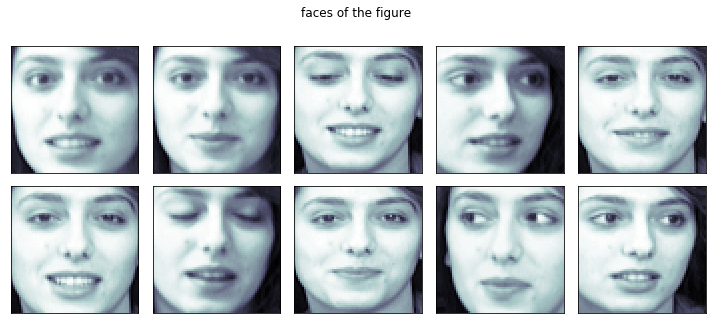

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
faces_all = fetch_olivetti_faces()
K = 7  # 7번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]
X3 = faces_all.data[faces_all.target == K]
print(faces.shape)
print(X3.shape)
N = 2
M = 5
fig = plt.figure(figsize=(10, 5)) # 새로운 figure를 생성
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1) # 축을 가지는 하나의 좌표평면과 같은 개념
        # 실제로 데이터가 그려지는 곳은 axes
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("faces of the figure")
plt.tight_layout()
plt.show() # 생성된 모든 figure을 보여줌

In [ ]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)
print(W3.shape)
print(X32.shape)

(10, 2)
(10, 4096)


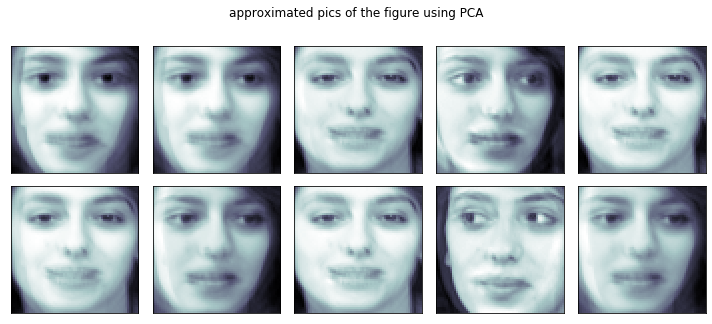

In [ ]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("approximated pics of the figure using PCA")
plt.tight_layout()
plt.show()

In [ ]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

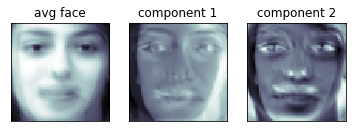

In [ ]:
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("avg face")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("component 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("component 2")
plt.show()


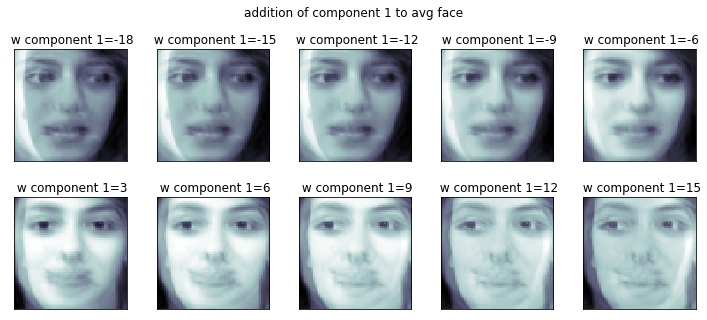

In [ ]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 3 * (k - 6) if k < 5 else 3 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(" w component 1={}".format(w))
plt.suptitle("addition of component 1 to avg face")
plt.tight_layout()
plt.show()

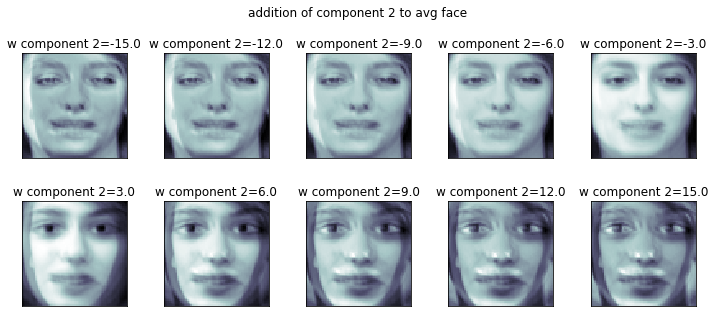

In [ ]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 3 * (k - 5) if k < 5 else 3 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("w component 2={:.1f}".format(w))
plt.suptitle("addition of component 2 to avg face")
plt.tight_layout()
plt.show()

### 와인데이터를 활용한 PCA와 LDA 비교

In [5]:
# wine data 불러오기 
import pandas as pd
dat_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None) # wine data 불러오기

from sklearn.model_selection import train_test_split
X,y=dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1,stratify=y)

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [6]:
dat_wine.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [7]:
# 고유값, 고유벡터 구하기 -> 밑에 그림을 구하기 위함
import numpy as np
scov=np.cov(X_train_std.T) # 공분산 행렬 구하기
eigen_vals, eigen_vecs=np.linalg.eig(scov) # 고유값과 고유벡터
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


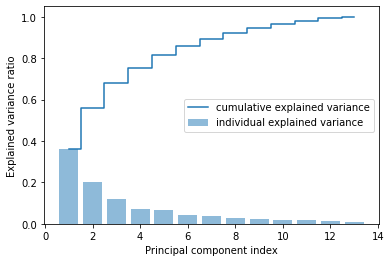

In [8]:
# Explained variance ratio
# 누적 분산 계산
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [9]:
# PCA를 통해 차원 축소 후 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

lpca = PCA(n_components=4)
X_train_pca = lpca.fit_transform(X_train_std)
X_test_pca = lpca.transform(X_test_std)

lr=LogisticRegression()
lr.fit(X_train_pca, y_train)
y_train_pre=lr.predict(X_train_pca)
y_test_pre=lr.predict(X_test_pca)

from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pre))
print(metrics.accuracy_score(y_test, y_test_pre))

0.9758064516129032
0.9629629629629629


In [10]:
print(lpca.components_)
print(lpca.explained_variance_ratio_)

[[ 0.14119433 -0.24946815  0.05104853 -0.19890851  0.1444494   0.40472564
   0.42654202 -0.29573373  0.32620144 -0.07420694  0.29277478  0.37482201
   0.2889145 ]
 [-0.46732089 -0.26876924 -0.27660192  0.01955098 -0.32120489 -0.04839313
   0.00936768 -0.00146817 -0.04087554 -0.53982087  0.27536907  0.19149315
  -0.34828709]
 [-0.18497972  0.11558438  0.62580603  0.63022498  0.06808315  0.14454263
   0.16109721  0.20830498  0.10392829 -0.07463025  0.04770525  0.16694498
  -0.14905602]
 [-0.06135175  0.50736306 -0.23358668  0.06619111 -0.21808618  0.10100723
   0.07511595 -0.33032862  0.45117801 -0.01323281 -0.46488038  0.19553794
  -0.22195876]]
[0.35935182 0.20113893 0.11882529 0.07128404]


In [11]:
# LDA로 차원 축소 후 로지스틱 회귀
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA(n_components=2) # LDA에 n_components=2를 지정하면 LDA가 차원을 2로 줄여준다. 
X_train_lda=lda.fit_transform(X_train_std,y_train) # wine data에 의해 뽑힘.
X_test_lda=lda.transform(X_test_std) 

lr=LogisticRegression()
lr.fit(X_train_lda, y_train)
y_train_pred=lr.predict(X_train_lda)
y_test_pred=lr.predict(X_test_lda)

print(metrics.accuracy_score(y_train, y_train_pred)) 
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

1.0
0.9629629629629629
[[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]


In [12]:
lda.explained_variance_ratio_

array([0.68259828, 0.31740172])

In [13]:
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train_std)
print(pca.explained_variance_ratio_)

[0.35935182 0.20113893 0.11882529 0.07128404 0.0649561  0.04356648
 0.03545179 0.02881555 0.02103776 0.02007144 0.01614956 0.01140877
 0.00794247]


In [14]:
#표준화 하지 않았을 때
import numpy as np
scov=np.cov(X_train.T)
eigen_vals, eigen_vecs=np.linalg.eig(scov)
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[1.02658514e+05 1.49109414e+02 9.98420802e+00 5.16719770e+00
 1.18134401e+00 8.16227079e-01 2.80024580e-01 1.39837783e-01
 1.03492409e-01 8.46950481e-03 2.09497819e-02 3.51494767e-02
 7.57895886e-02]


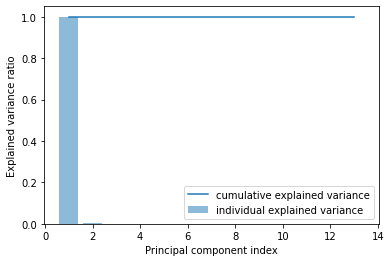

In [15]:
#표준화 하지 않았을 때
# Explained variance ratio
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [18]:
# PCA를 통해 차원 축소후 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
lr=LogisticRegression()
lpca = PCA(n_components=3)
X_train_pca = lpca.fit_transform(X_train)
X_test_pca = lpca.transform(X_test)
lr.fit(X_train_pca, y_train)
y_train_pre=lr.predict(X_train_pca)
y_test_pre=lr.predict(X_test_pca)

from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pre))
print(metrics.accuracy_score(y_test, y_test_pre))

0.7983870967741935
0.6851851851851852


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
#표준화하지 않았을 때
# LDA로 차원 축소 후 로지스틱 회귀
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2) # LDA에 n_components=2를 지정하면 LDA가 차원을 2로 줄여준다. 
X_train_lda=lda.fit_transform(X_train,y_train) # wine data에 의해 뽑힘.
X_test_lda=lda.transform(X_test) 
lr=LogisticRegression()
lr.fit(X_train_lda, y_train)
y_train_pred=lr.predict(X_train_lda)
y_test_pred=lr.predict(X_test_lda)
print(metrics.accuracy_score(y_train, y_train_pred)) 
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

1.0
0.9629629629629629
[[18  0  0]
 [ 1 19  1]
 [ 0  0 15]]


In [20]:
#표준화 하지 않았을 때
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[9.98376646e-01 1.45012186e-03 9.70986205e-05 5.02521349e-05
 1.14888305e-05 7.93798799e-06 2.72330067e-06 1.35995321e-06
 1.00648645e-06 7.37070430e-07 3.41836397e-07 2.03741240e-07
 8.23677984e-08]


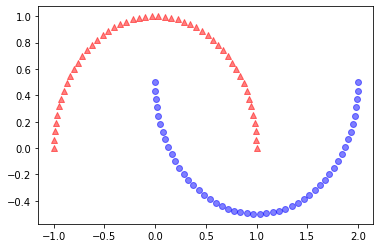

In [21]:
# Kernel PCA

# moon data 불러오기
from sklearn.datasets import make_moons
X, y=make_moons(n_samples=100, random_state=123)

import matplotlib.pyplot as plt
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

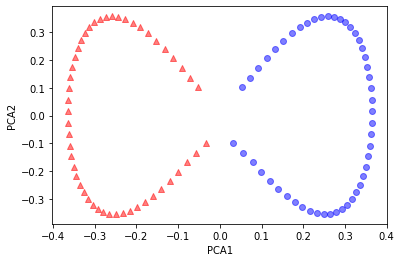

In [22]:
# moon data에 대한 PCA 
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca=kpca.fit_transform(X)
plt.scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [23]:
# manifold 

# data 불러오기 : 최종 데이터는 X1이며 프로그램 해설은 생략.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]
X = make_hello(1000)

def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
X1 = random_projection(X, 3)
X1.shape

(1000, 3)

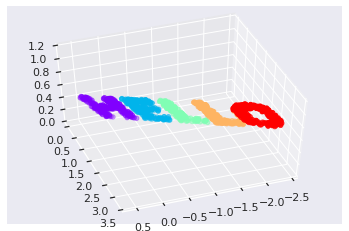

In [24]:
# data의 형태
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X1[:, 0], X1[:, 1], X1[:, 2],**colorize)
ax.view_init(azim=70, elev=50)

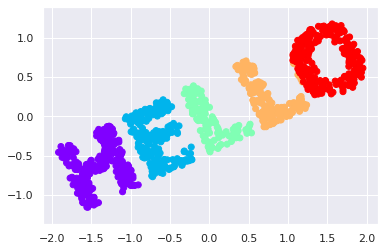

In [25]:
# Hello에 대한 MDS
from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=1)
out_mds = mds.fit_transform(X1)
plt.scatter(out_mds[:, 0], out_mds[:, 1], **colorize)
plt.axis('equal');

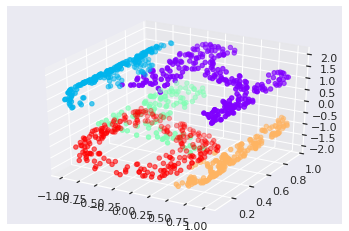

In [26]:
# 비선형 차원축소 기법을 위한 S자 형태의 3차원 HELLO
def make_hello_s_curve(X):
    t = (X[:,0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T
XS = make_hello_s_curve(X)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],**colorize);

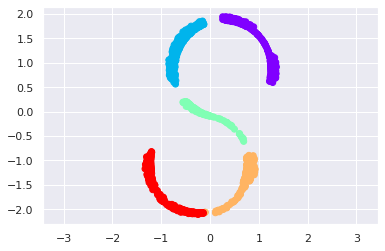

In [27]:
# MDS에 의한 S자형 HELLO 축소
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
mds_out = model.fit_transform(XS)
plt.scatter(mds_out[:, 0], mds_out[:, 1], **colorize)
plt.axis('equal');

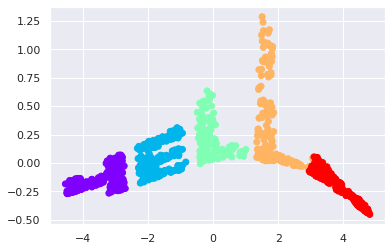

In [28]:
# ISOMAP에 의한 차원 축소
from sklearn.manifold import Isomap
iso=Isomap(n_neighbors=100, n_components=2)
iso_out=iso.fit_transform(XS)
fig,ax=plt.subplots()
ax.scatter(iso_out[:,0], iso_out[:,1], **colorize)

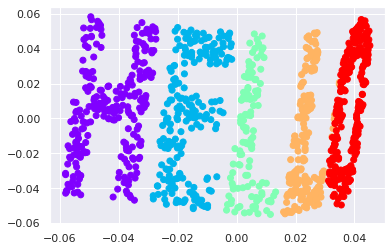

In [29]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
lle=LLE(n_neighbors=100, n_components=2, method='modified')
lle_out=lle.fit_transform(XS)
fig,ax=plt.subplots()
ax.scatter(lle_out[:,0], lle_out[:,1], **colorize)
plt.show()